## Compare the evolution of the geometric emittance for the three different sourced of tune spread (beam-beam kick, octupole and detuner) 

In [1]:
ls /afs/cern.ch/work/n/natriant/private

my_tracking_model_htcondor/  simulation_data_2018/  sixdesk/  workspaces/


In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from math import *

In [2]:
### Import plotting parameters

In [3]:
params = {'legend.fontsize': 25,
          'figure.figsize': (8.5, 7),
          'axes.labelsize': 27,
          'axes.titlesize': 23,
          'xtick.labelsize': 27,
          'ytick.labelsize': 27,
          'image.cmap': 'jet',
          'lines.linewidth': 1,
          'lines.markersize': 10,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

In [4]:
# #--- <x^2> ---
def mean2(numb):
    return np.mean( (numb - np.mean(numb))**2 )

# #--- <xx'> ---
def mean3(numbx , numbpx):
    return np.mean( (numbx - np.mean(numbx)) * (numbpx - np.mean(numbpx)) )

# #--- sqrt(<x^2> * <px^2> - <xx'>^2) --- compute statistical emittance
def cmp_emit(position, angle):
    return  np.sqrt(mean2(position) * mean2(angle) - mean3(position,angle)**2) # geometrical emittance

In [5]:
data = {}
with open('./configuration_files/config_rate_vs_BB_vs_noise.json', "r") as read_file:  # The only parameters that you actually use from this file is the beta_x, and the number of turns and particles.
        data = json.load(read_file)
my_afs_path = '/afs/cern.ch/work/n/natriant/private/my_tracking_model_htcondor/tracking_data/'

### Give the name of the studies

In [6]:
studies_names = ['Qx62.775_detuner5825.61_g0.200_delta0.316_betax115.75_particles15000_turns1000_aperture0.03.pkl', 'Qx62.775_k3_int5825.61_segments8_g0.200_delta0.316_betax115.75_particles15000_turns1000_v1.pkl', 'Qx62.78_ksi0.005_g0.200_delta0.316_betax115.75_particles15000_turns1000_v1.pkl'  ]

#### Iterate though the studies and calculate the geometric emittance per turn

In [11]:
ex_dictionary = {}
for index, study in enumerate(studies_names) :
    ex_dictionary['study_{}'.format(index)] = []
    df = pd.read_pickle(my_afs_path+ study)
    for turn in range(data['study_parameters']['turns']):
        ex_dictionary['study_{}'.format(index)].append(cmp_emit(df.at[turn, 'x']/sqrt(data['machine_parameters']['beta_x']), df.at[turn, 'px']*sqrt(data['machine_parameters']['beta_x'] )))

### Plotting . Don't forget to set the name of the .png file

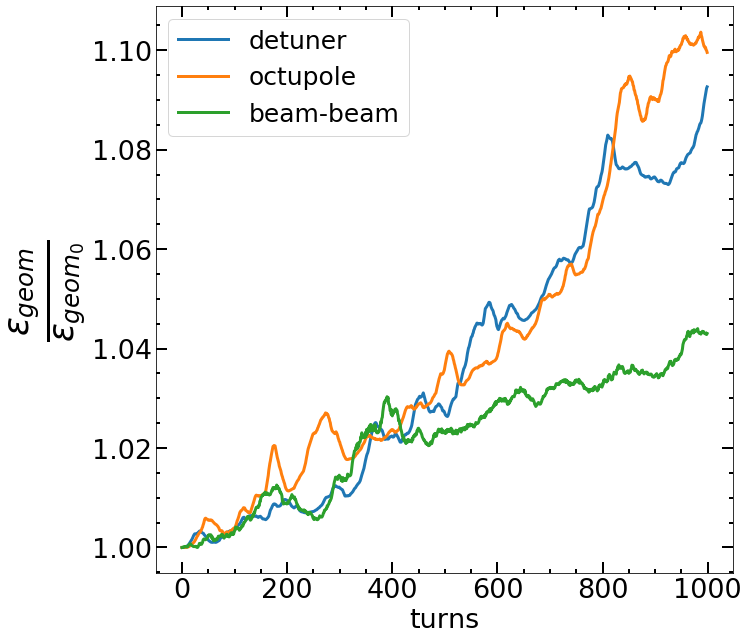

In [15]:
turns_list = np.arange(0, data['study_parameters']['turns'])
labels = ['detuner', 'octupole', 'beam-beam']
fig, ax = plt.subplots(1,1,figsize=(10.5,9))

for index, study in enumerate(studies_names) :
    ax.plot(turns_list, ex_dictionary['study_{}'.format(index)]/ex_dictionary['study_{}'.format(index)][0], label = '{}'.format(labels[index]), linewidth = 3)
ax.set_xlabel('turns')
ax.set_ylabel(r'$\frac{\epsilon_{geom}}{\epsilon_{geom_0}} $', fontsize = 50)

# Set the ticks in both sides of the axes
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
# Display minor ticks on the axis
ax.minorticks_on() 


# Set the appearance of the ticks
ax.tick_params(which='both',direction='in', width=2)
ax.tick_params(which='major',direction='in', length=11)
ax.tick_params(which='minor',direction='in', length=4)



# Make axis equal. Note that the size of the figure affects this
ax.set_aspect(aspect='auto')
plt.legend()

#plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()



savefig = False
if savefig: 
    plt.savefig('./figures/emittance_evolution_oct_vs_BB_vs_detuner_tune_shift0.005_g0.200_delta0.316_betax115.75_particles15000_turns1000_aperture3e-2.png')